<a href="https://colab.research.google.com/github/hoyeon15/bigdata-/blob/main/13%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving subwayfee.csv to subwayfee.csv


In [ ]:
import pandas as pd

In [ ]:
subway_data

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320
1,2022-10,1호선,151,시청,638454,654541,119508,116903
2,2022-10,1호선,152,종각,893135,864755,153798,143813
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084
4,2022-10,1호선,154,종로5가,442041,447014,260373,250139
...,...,...,...,...,...,...,...,...
610,2022-10,신림선,4407,당곡,81731,77226,29900,29421
611,2022-10,신림선,4408,신림,32906,47581,14007,16623
612,2022-10,신림선,4409,서원,67113,53390,20387,20283
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830


In [ ]:
subway_data.info()

In [ ]:
subway_data.describe()

In [ ]:
print(subway_data['유임승차'] / subway_data['무임승차'])
print('')
print(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']))

In [ ]:
(subway_data['유임승차'] / subway_data['무임승차']).max()

In [ ]:
(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차'])).max()

In [ ]:
rate_table = pd.DataFrame(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']), columns = ['rate'])
rate_table

In [ ]:
added_subway = pd.concat([subway_data, rate_table], axis = 1)
added_subway

In [ ]:
added_subway['총이용객']=added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1)
added_subway

In [ ]:
added_subway[added_subway['총이용객'] == added_subway['총이용객'].max()]

In [ ]:
subway_data

In [ ]:
#0번 인덱스 Series로 가져오기
subway_data.loc[0]

사용월     2022-10
호선명         1호선
역ID         150
지하철역        서울역
유임승차    1307627
유임하차    1279921
무임승차     218542
무임하차     210320
Name: 0, dtype: object

In [ ]:
#만약 1, 3, 5 인덱스의 데이터를 한꺼번에 가져오고 싶다면, 리스트에 원하는 인덱스를 담아 loc 에 넣자.
subway_data.loc[[1,3,5]]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
1,2022-10,1호선,151,시청,638454,654541,119508,116903
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084
5,2022-10,1호선,155,동대문,231006,219104,124571,124404


In [ ]:
#데이터 프레임에서 0번째 행 데이터를 가져오자.
subway_data.iloc[0]

사용월     2022-10
호선명         1호선
역ID         150
지하철역        서울역
유임승차    1307627
유임하차    1279921
무임승차     218542
무임하차     210320
Name: 0, dtype: object

In [ ]:
#마지막 행을 가져오자.
subway_data.iloc[-1]

사용월      2022-10
호선명          신림선
역ID         4411
지하철역    관악산(서울대)
유임승차       61343
유임하차       66102
무임승차       38873
무임하차       39197
Name: 614, dtype: object

In [ ]:
#tail 명령어로 끝에서 n번째 행까지 추출할 수도 있다.
subway_data.tail(3)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
612,2022-10,신림선,4409,서원,67113,53390,20387,20283
613,2022-10,신림선,4410,서울대벤처타운,163418,153554,54953,55830
614,2022-10,신림선,4411,관악산(서울대),61343,66102,38873,39197


In [ ]:
#여러 행을 가져오자.
subway_data.iloc[[0,1,3,-1]]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2022-10,1호선,150,서울역,1307627,1279921,218542,210320
1,2022-10,1호선,151,시청,638454,654541,119508,116903
3,2022-10,1호선,153,종로3가,499373,442702,319982,296084
614,2022-10,신림선,4411,관악산(서울대),61343,66102,38873,39197


In [ ]:
#5행~10행(미만)까지 가져오고 싶다면...
subway_data.iloc[5:10]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
5,2022-10,1호선,155,동대문,231006,219104,124571,124404
6,2022-10,1호선,156,신설동,280677,270784,121048,116766
7,2022-10,1호선,157,제기동,234930,222417,287970,309026
8,2022-10,1호선,158,청량리(서울시립대입구),345240,346252,261608,265382
9,2022-10,1호선,159,동묘앞,144243,154090,166501,169644


In [ ]:
#유임승차인원이 5만 미만인 역만 알고 싶다면...
under5 = subway_data['유임승차'] < 50000
subway_data[under5]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
54,2022-10,2호선,245,신답,37787,41202,10111,10988
56,2022-10,2호선,247,도림천,27130,28264,8108,9093
59,2022-10,2호선,250,용두(동대문구청),44751,42967,22939,24060
72,2022-10,3호선,321,충무로,46,0,6,0
116,2022-10,4호선,431,동작(현충원),37746,40430,15949,15776
...,...,...,...,...,...,...,...,...
597,2022-10,우이신설선,4707,삼양사거리,39803,38653,36746,37079
602,2022-10,우이신설선,4712,보문,30896,31089,15161,15198
603,2022-10,우이신설선,4713,신설동,35947,37057,29450,26741
608,2022-10,신림선,4405,보라매공원,38760,41511,13924,15282


In [ ]:
#유임승차인원이 5만 미만인 4호선 역만 알고 싶다면...
under5_4 = subway_data[(subway_data['유임승차'] < 50000) & (subway_data['호선명']=='4호선')]
under5_4

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
116,2022-10,4호선,431,동작(현충원),37746,40430,15949,15776
119,2022-10,4호선,434,남태령,31908,24496,8948,8057


In [ ]:
#행 삭제: 0행을 삭제해보자.
subway_data=subway_data.drop(index=0, axis=0)

In [ ]:
#데이터 프레임에서 0번째 행 데이터를 가져오면 아까 1번이었던 지하철역이 0번째 행으로 나타난다.
subway_data.iloc[0]

사용월     2022-10
호선명         1호선
역ID         151
지하철역         시청
유임승차     638454
유임하차     654541
무임승차     119508
무임하차     116903
Name: 1, dtype: object

In [ ]:
#다만 0번 인덱스였던 데이터는 삭제되었으므로 나타나지 않는다.
subway_data.loc[0]

KeyError: ignored

In [ ]:
#특정 열만 가져올 수도 있다. 무임승하차만 가져와본다면...
subway_data.loc[:,['무임승차', '무임하차']]

,무임승차,무임하차
1,119508,116903
2,153798,143813
3,319982,296084
4,260373,250139
5,124571,124404
...,...,...
610,29900,29421
611,14007,16623
612,20387,20283
613,54953,55830


In [ ]:
#1, 4번 역의 무임승하차만 보고싶다면...
subway_data.loc[[1,4],['무임승차','무임하차']]

,무임승차,무임하차
1,119508,116903
4,260373,250139


In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving subwaytime.csv to subwaytime.csv


In [ ]:

import pandas as pd

In [ ]:
subway_data = pd.read_csv('subwaytime.csv', encoding='cp949', thousands=',')
subway_data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"14,843","2,421","2,533",2,172,0,0,0,0,2022-11-03 10:23:13
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"3,367",405,797,1,16,0,0,0,0,2022-11-03 10:23:13
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"4,125",995,712,0,0,0,0,0,0,2022-11-03 10:23:13
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"4,564","1,367","1,716",6,20,0,0,0,0,2022-11-03 10:23:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,"3,464",196,"1,036",0,0,0,0,0,0,2022-11-03 10:23:13
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,"2,011",176,675,0,1,0,0,0,0,2022-11-03 10:23:13
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,"3,567",94,"1,218",0,0,0,0,0,0,2022-11-03 10:23:13
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"8,955",302,"3,975",0,163,0,0,0,0,2022-11-03 10:23:13


In [ ]:
#작업일시 열 삭제
del subway_data['작업일시']

In [ ]:
subway_data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


In [ ]:
column_names = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4, 24):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

for i in range(0,4):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

In [ ]:
column_names

['사용월',
 '호선명',
 '역ID',
 '지하철역',
 '4시 승차',
 '4시 하차',
 '5시 승차',
 '5시 하차',
 '6시 승차',
 '6시 하차',
 '7시 승차',
 '7시 하차',
 '8시 승차',
 '8시 하차',
 '9시 승차',
 '9시 하차',
 '10시 승차',
 '10시 하차',
 '11시 승차',
 '11시 하차',
 '12시 승차',
 '12시 하차',
 '13시 승차',
 '13시 하차',
 '14시 승차',
 '14시 하차',
 '15시 승차',
 '15시 하차',
 '16시 승차',
 '16시 하차',
 '17시 승차',
 '17시 하차',
 '18시 승차',
 '18시 하차',
 '19시 승차',
 '19시 하차',
 '20시 승차',
 '20시 하차',
 '21시 승차',
 '21시 하차',
 '22시 승차',
 '22시 하차',
 '23시 승차',
 '23시 하차',
 '0시 승차',
 '0시 하차',
 '1시 승차',
 '1시 하차',
 '2시 승차',
 '2시 하차',
 '3시 승차',
 '3시 하차']

In [ ]:
#위에서 만든 열 이름을 데이터에 붙인다.
subway_data.columns = column_names
subway_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
5,2022-10,1호선,154.0,종로5가,37,0,"1,894","3,542","3,029","15,796",...,"7,388","2,837",342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


In [ ]:
subway_data=subway_data.drop([0])
subway_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
5,2022-10,1호선,154.0,종로5가,37,0,"1,894","3,542","3,029","15,796",...,"7,388","2,837",342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


In [ ]:
subway_data.dropna()

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
5,2022-10,1호선,154.0,종로5가,37,0,"1,894","3,542","3,029","15,796",...,"7,388","2,837",342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


In [ ]:
# 데이터프레임의 기본정보
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     615 non-null    object 
 1   호선명     615 non-null    object 
 2   역ID     615 non-null    float64
 3   지하철역    615 non-null    object 
 4   4시 승차   615 non-null    object 
 5   4시 하차   615 non-null    object 
 6   5시 승차   615 non-null    object 
 7   5시 하차   615 non-null    object 
 8   6시 승차   615 non-null    object 
 9   6시 하차   615 non-null    object 
 10  7시 승차   615 non-null    object 
 11  7시 하차   615 non-null    object 
 12  8시 승차   615 non-null    object 
 13  8시 하차   615 non-null    object 
 14  9시 승차   615 non-null    object 
 15  9시 하차   615 non-null    object 
 16  10시 승차  615 non-null    object 
 17  10시 하차  615 non-null    object 
 18  11시 승차  615 non-null    object 
 19  11시 하차  615 non-null    object 
 20  12시 승차  615 non-null    object 
 21  12시 하차  615 non-null    object 
 22  13

In [ ]:
subway_data.iloc[:, range(4, 52)] = subway_data.iloc[:, range(4, 52)].astype(int)
subway_data.info()

ValueError: ignored

In [ ]:
temp=subway_data.iloc[:, range(4,52)]

In [ ]:
temp

,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,707,34,"9,180","9,659","13,511","55,432","40,840","105,943","71,256","205,484",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,112,0,"2,364","5,063","3,908","26,854","7,253","62,283","9,735","175,247",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,97,5,"3,990","4,469","4,237","22,659","6,536","91,028","10,505","225,517",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,219,18,"4,334","3,280","4,065","13,620","5,288","24,619","10,205","68,144",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
5,37,0,"1,894","3,542","3,029","15,796","5,328","39,957","9,058","92,084",...,"7,388","2,837",342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,"1,424",147,"3,586",922,"10,552","2,713","15,224","6,410",...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,1,0,709,170,"1,002",561,"3,448","1,237","6,183","2,023",...,650,"2,011",176,675,0,1,0,0,0,0
613,1,0,"1,975",116,"3,075",612,"10,973","1,180","17,253","1,650",...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,0,0,"4,730",211,"6,998","2,347","22,640","5,122","31,353","7,794",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


In [ ]:
temp = temp.apply(lambda x: x.str.replace(',', ''))

In [ ]:
temp

,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,707,34,9180,9659,13511,55432,40840,105943,71256,205484,...,26783,14843,2421,2533,2,172,0,0,0,0
2,112,0,2364,5063,3908,26854,7253,62283,9735,175247,...,10639,3367,405,797,1,16,0,0,0,0
3,97,5,3990,4469,4237,22659,6536,91028,10505,225517,...,28401,4125,995,712,0,0,0,0,0,0
4,219,18,4334,3280,4065,13620,5288,24619,10205,68144,...,18163,4564,1367,1716,6,20,0,0,0,0
5,37,0,1894,3542,3029,15796,5328,39957,9058,92084,...,7388,2837,342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,1424,147,3586,922,10552,2713,15224,6410,...,860,3464,196,1036,0,0,0,0,0,0
612,1,0,709,170,1002,561,3448,1237,6183,2023,...,650,2011,176,675,0,1,0,0,0,0
613,1,0,1975,116,3075,612,10973,1180,17253,1650,...,341,3567,94,1218,0,0,0,0,0,0
614,0,0,4730,211,6998,2347,22640,5122,31353,7794,...,1512,8955,302,3975,0,163,0,0,0,0


In [ ]:
rush_data=subway_data.iloc[:,range(0,4)]
rush_data

,사용월,호선명,역ID,지하철역
1,2022-10,1호선,150.0,서울역
2,2022-10,1호선,151.0,시청
3,2022-10,1호선,152.0,종각
4,2022-10,1호선,153.0,종로3가
5,2022-10,1호선,154.0,종로5가
...,...,...,...,...
611,2022-10,신림선,4407.0,당곡
612,2022-10,신림선,4408.0,신림
613,2022-10,신림선,4409.0,서원
614,2022-10,신림선,4410.0,서울대벤처타운


In [ ]:
time_data = pd.concat([rush_data, temp], axis=1)

In [ ]:
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2022-10,1호선,150.0,서울역,707,34,9180,9659,13511,55432,...,26783,14843,2421,2533,2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,2364,5063,3908,26854,...,10639,3367,405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,3990,4469,4237,22659,...,28401,4125,995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,4334,3280,4065,13620,...,18163,4564,1367,1716,6,20,0,0,0,0
5,2022-10,1호선,154.0,종로5가,37,0,1894,3542,3029,15796,...,7388,2837,342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,1424,147,3586,922,...,860,3464,196,1036,0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,1002,561,...,650,2011,176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,1975,116,3075,612,...,341,3567,94,1218,0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,4730,211,6998,2347,...,1512,8955,302,3975,0,163,0,0,0,0


In [ ]:
time_data.iloc[:, range(4, 52)] = time_data.iloc[:, range(4, 52)].astype(int)
time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     615 non-null    object 
 1   호선명     615 non-null    object 
 2   역ID     615 non-null    float64
 3   지하철역    615 non-null    object 
 4   4시 승차   615 non-null    int64  
 5   4시 하차   615 non-null    int64  
 6   5시 승차   615 non-null    int64  
 7   5시 하차   615 non-null    int64  
 8   6시 승차   615 non-null    int64  
 9   6시 하차   615 non-null    int64  
 10  7시 승차   615 non-null    int64  
 11  7시 하차   615 non-null    int64  
 12  8시 승차   615 non-null    int64  
 13  8시 하차   615 non-null    int64  
 14  9시 승차   615 non-null    int64  
 15  9시 하차   615 non-null    int64  
 16  10시 승차  615 non-null    int64  
 17  10시 하차  615 non-null    int64  
 18  11시 승차  615 non-null    int64  
 19  11시 하차  615 non-null    int64  
 20  12시 승차  615 non-null    int64  
 21  12시 하차  615 non-null    int64  
 22  13

In [ ]:
time_data.iloc[:, range(10, 16)].max()

7시 승차    183708
7시 하차    136882
8시 승차    273219
8시 하차    347398
9시 승차    170806
9시 하차    289330
dtype: int64

In [ ]:
temp_data = pd.DataFrame(time_data.iloc[:, [10, 11]].sum(axis = 1), columns = ['7시 승하차'])
pd.concat([rush_data, temp_data], axis = 1)

,사용월,호선명,역ID,지하철역,7시 승하차
1,2022-10,1호선,150.0,서울역,146783
2,2022-10,1호선,151.0,시청,69536
3,2022-10,1호선,152.0,종각,97564
4,2022-10,1호선,153.0,종로3가,29907
5,2022-10,1호선,154.0,종로5가,45285
...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,13265
612,2022-10,신림선,4408.0,신림,4685
613,2022-10,신림선,4409.0,서원,12153
614,2022-10,신림선,4410.0,서울대벤처타운,27762


In [ ]:
n = 7
for i in range(10, 16, 2):
    columns_name = str(n) + '시 승하차'
    temp_data = pd.DataFrame(time_data.iloc[:, [i, i+1]].sum(axis = 1), columns = [columns_name])
    rush_data = pd.concat([rush_data, temp_data], axis = 1)
    n += 1

rush_data

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
1,2022-10,1호선,150.0,서울역,146783,276740,213070
2,2022-10,1호선,151.0,시청,69536,184982,106760
3,2022-10,1호선,152.0,종각,97564,236022,156671
4,2022-10,1호선,153.0,종로3가,29907,78349,81944
5,2022-10,1호선,154.0,종로5가,45285,101142,75350
...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,13265,21634,14154
612,2022-10,신림선,4408.0,신림,4685,8206,5986
613,2022-10,신림선,4409.0,서원,12153,18903,11515
614,2022-10,신림선,4410.0,서울대벤처타운,27762,39147,25713


In [ ]:
rush_data.iloc[:, [4, 5, 6]].max()

7시 승하차    212118
8시 승하차    403486
9시 승하차    339533
dtype: int64

In [ ]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]['지하철역']

42    구로디지털단지
Name: 지하철역, dtype: object

In [ ]:
get_on_data = time_data.iloc[:, range(4,52,2)]
get_on_data

,4시 승차,5시 승차,6시 승차,7시 승차,8시 승차,9시 승차,10시 승차,11시 승차,12시 승차,13시 승차,...,18시 승차,19시 승차,20시 승차,21시 승차,22시 승차,23시 승차,0시 승차,1시 승차,2시 승차,3시 승차
1,707,9180,13511,40840,71256,61307,62514,77285,84928,85858,...,205513,115319,82912,85422,56471,26783,2421,2,0,0
2,112,2364,3908,7253,9735,12189,14635,20715,24213,32591,...,154910,62838,53970,47960,31231,10639,405,1,0,0
3,97,3990,4237,6536,10505,13644,18618,26998,33812,43796,...,199207,89244,77276,82994,60677,28401,995,0,0,0
4,219,4334,4065,5288,10205,14664,21017,31501,44492,52580,...,100386,62024,49365,51434,40353,18163,1367,6,0,0
5,37,1894,3029,5328,9058,12874,20615,32117,42650,50938,...,96755,52058,36168,32016,21285,7388,342,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,1424,3586,10552,15224,9540,6446,6001,6404,6484,...,7606,4162,3660,2468,1733,860,196,0,0,0
612,1,709,1002,3448,6183,3654,2447,2302,2766,2804,...,3242,2283,1615,1460,1091,650,176,0,0,0
613,1,1975,3075,10973,17253,9978,5858,4792,5209,4722,...,3318,2088,1370,973,726,341,94,0,0,0
614,0,4730,6998,22640,31353,19480,13222,12192,13720,13237,...,12141,6580,4880,4313,3962,1512,302,0,0,0


In [ ]:
get_off_data = time_data.iloc[:, range(5,52,2)]
get_off_data

,4시 하차,5시 하차,6시 하차,7시 하차,8시 하차,9시 하차,10시 하차,11시 하차,12시 하차,13시 하차,...,18시 하차,19시 하차,20시 하차,21시 하차,22시 하차,23시 하차,0시 하차,1시 하차,2시 하차,3시 하차
1,34,9659,55432,105943,205484,151763,84310,72422,83084,82661,...,97618,67072,48011,42691,30503,14843,2533,172,0,0
2,0,5063,26854,62283,175247,94571,47845,50439,50477,48653,...,27657,13198,8140,7461,5655,3367,797,16,0,0
3,5,4469,22659,91028,225517,143027,64225,63080,56945,56477,...,49606,24804,11985,8650,6120,4125,712,0,0,0
4,18,3280,13620,24619,68144,67280,59341,69818,73032,68101,...,41568,21684,11437,8953,6544,4564,1716,20,0,0
5,0,3542,15796,39957,92084,62476,56554,61749,60925,57242,...,32409,17687,8491,6401,4680,2837,893,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,147,922,2713,6410,4614,3821,3956,4550,4949,...,13994,10508,6228,5807,5118,3464,1036,0,0,0
612,0,170,561,1237,2023,2332,2217,2715,3230,3324,...,8983,6055,3696,3535,2820,2011,675,1,0,0
613,0,116,612,1180,1650,1537,1704,2038,2544,2783,...,9730,8911,5781,5718,5191,3567,1218,0,0,0
614,0,211,2347,5122,7794,6233,6052,6623,8177,8679,...,26407,22901,13833,13141,13012,8955,3975,163,0,0


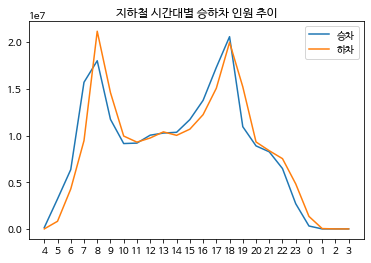

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(range(24), get_on_data.sum(), label = '승차')
plt.plot(range(24), get_off_data.sum(), label = '하차')
plt.legend()
plt.xticks(range(24), list(range(4,24)) + [0, 1, 2, 3])
plt.show()